
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [154]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for vizualization and creating statistics
from matplotlib import pyplot as plt # used for making matplotlib work like matlab
import pylab # used for to import functions from Numpy and Matplotlib.
import pingouin as pg # used for statstical functions

df_mh = pd.read_csv('MillerHadenData.csv')

In [155]:
# Q1a (code):

# Display first few rows of the dataframe
print(df_mh.head(5))

# Check data types and information
print(df_mh.dtypes)
print(df_mh.info())

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
Participant    int64
Abil           int64
IQ             int64
Home           int64
TV             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [208]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
miss_val = df_mh[['Abil', 'IQ']].isnull().sum(axis=1)

# Count the number of participants with missing values for either variable
participants_with_missing_values = (miss_val > 0).sum()
if participants_with_missing_values == 0:
    print("All participants have data points for both variables.")
else:
    print(f"There are {participants_with_missing_values} participants with missing values for either variable.")

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
All participants have data points for both variables.


In [171]:
# Q1c (code):
# Check data distribution using Shapiro text as above
shapiro_abil, p_val_ab = stats.shapiro(df_mh["Abil"]) 
print(shapiro_abil, p_val_ab)

shapiro_abil, p_val_ab = stats.shapiro(df_mh["IQ"])
print(shapiro_abil, p_val_ab)

0.9487950205802917 0.2354886382818222
0.9636043310165405 0.4908201992511749


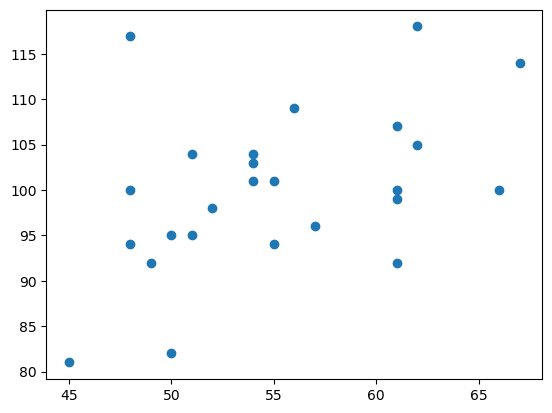

In [158]:
# Q1d (code):
# Scatter plot
scatter = plt.scatter(df_mh['Abil'], df_mh['IQ'])

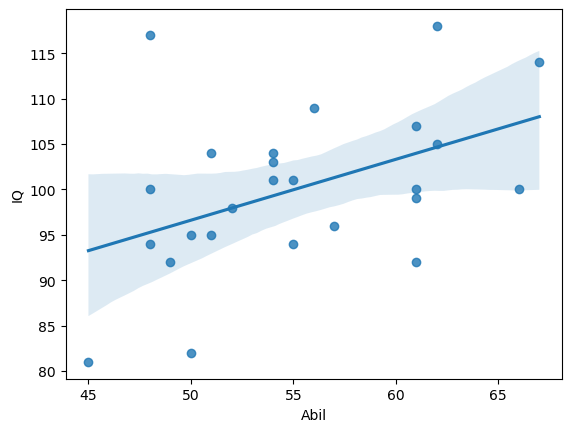

In [104]:
# Q1e (code):
# Correlation line
correlation_coefficient = sns.regplot(x="Abil", y="IQ",data=df_mh[["Abil", "IQ"]]) 

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [24]:
# Q2a (answer with words): Pearson because it's parametric

In [13]:
# Q2b (code):
x = df_mh["Abil"] #assigne value ability to x
y = df_mh["IQ"] #assigne value IQ to y
pg.corr(x, y, method="pearson").round(3) #use the Pingouin correlation methode with chosen methode (Pearson). 

,n,r,CI95%,p-val,BF10,power
pearson,25,0.451,"[0.07, 0.72]",0.024,2.804,0.64


In [153]:
# Q2c (answer with words):
#the CC is a moderate positive, which means that if one increases, the other one will have the tendency to increase too but only moderatly on the same dorection."""

'the CC isa moderate positive, which means that if one increases, the other one will have the tendency to increase too but only moderatly on the same dorection.'

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
#H0: There is an association between reading ability and the amount of time spent reading at home per week.
# H1：There is no association between reading ability and the amount of time spent reading at home per week.

In [81]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data analysis
from scipy.stats import chi2_contingency ##used for computing the chi-square test

# Define the rounded average for Reading Ability and Home
avg_abil = round(df_mh["Abil"].mean())  #using roun() fuction to round a number 
avg_home = round(df_mh["Home"].mean())

# Create the Rank_Abil column, iterate through all the values of Abil, compares abil tro the avg_abil and if it's less or equal it assigne low, otherwise high
rank_abil= df_mh["Rank_Abil"] = ["Low" if abil <= avg_abil else "High" for abil in df_mh["Abil"]]

# Create the Rank_Home column, with the same method as before but for Home
rank_home=df_mh["Rank_Home"] = ["Infrequent" if home <= avg_home else "Frequent" for home in df_mh["Home"]]
print(df_mh)

    Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0             1    61  107   144  487      High    Frequent
1             2    56  109   123  608      High  Infrequent
2             3    45   81   108  640       Low  Infrequent
3             4    66  100   155  493      High    Frequent
4             5    49   92   103  636       Low  Infrequent
5             6    62  105   161  407      High    Frequent
6             7    61   92   138  463      High    Frequent
7             8    55  101   119  717       Low  Infrequent
8             9    62  118   155  643      High    Frequent
9            10    61   99   121  674      High  Infrequent
10           11    51  104    93  675       Low  Infrequent
11           12    48  100   127  595       Low    Frequent
12           13    50   95    97  673       Low  Infrequent
13           14    50   82   140  523       Low    Frequent
14           15    67  114   151  665      High    Frequent
15           16    51   95   112  663   

In [31]:
# Q3c (code):
# Construct Contingency Matrix
contin_matr = pd.crosstab(df_mh["Rank_Abil"], df_mh["Rank_Home"]) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html. Method creates a contingency matrix between the previously created Rank Ability and Home column.
print(contin_matr)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [210]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

# Observed frequencies from the contingency matrix
observed_frequencies = [[8, 2],
                        [3, 12]]

chi2_stat, p_val, dof, expected = chi2_contingency(observed_frequencies)
print("Chi-square:", chi2_stat)
print("p-value:", p_val)

Chi-square: 6.500270562770561
p-value: 0.010785807794066234


In [ ]:
# Q3e (answer in words): 
#The chi-square seems to sugesst that there is an association between the reading ability and the frequency of staying at home.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [88]:
import pandas as pd #  used for data wrangling
from scipy import stats #
import numpy as np #
import matplotlib.pyplot as plt ##
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv("evaluators.csv")
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [95]:
# Q4a (code):
# Calculate mean and standard deviation for age
df_evaluators["age"].describe()

count    34.000000
mean     30.852941
std       6.238358
min      23.000000
25%      27.000000
50%      29.000000
75%      32.750000
max      48.000000
Name: age, dtype: float64

In [207]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = (df_evaluators["sex"] == 1).sum()
female_count = (df_evaluators["sex"] == 2).sum()

print("M =", male_count)
print("F =", female_count)

M = 4
F = 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [69]:
# Load ratings data
df_ratings = pd.read_csv("ratings.csv")
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [138]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
categories = ["thoughtful", "competent", "intelligent"]

# Filter the ratings DataFrame based on the categories
df_int = df_ratings[df_ratings["Category"].isin(categories)]

#print
print(df_int)

# Calculate the mean intellect rating for each evaluator
mean_int = df_int.groupby("eval_id")["Rating"].mean()

#Reset
intellect_df = mean_int.reset_index()
intellect_df.head()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_df["Category"] = "intellect"
intellect_df.head()

     eval_id     Category  Rating
0          1    competent     6.0
1          1   thoughtful     6.0
2          1  intelligent     6.0
5          2    competent     5.0
6          2   thoughtful     7.0
..       ...          ...     ...
186       38   thoughtful     5.0
187       38  intelligent     5.0
190       39    competent     5.0
191       39   thoughtful     6.0
192       39  intelligent     5.0

[117 rows x 3 columns]


,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect


In [190]:
# Create a DataFrame for 'impression' and 'hire' ratings
# Filter the ratings DataFrame based on the categories
categories_impr_hire = ["impression", "hire"]

# Filter the ratings DataFrame based on the categories
other_ratings_df = df_ratings[df_ratings["Category"].isin(categories_impr_hire)]

other_ratings_df.head()

# Combine the DataFrames to create 'ratings2'

# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
"""The .concat method is not working, so I looked up other ways to put together the two dataframes and decided to use merge. Doc: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html""" 
ratings2 = intellect_df.merge(impression_hire_df, how="outer")
ratings2.head(100)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column

rating2 = pd.merge(df_evaluators, ratings2, on="eval_id") 

# Select only the necessary columns as per the structure required
rating2 = rating2.drop("age", axis = "columns")
rating2 = rating2.drop("sex", axis = "columns")

# Arrange by 'eval_id' and 'Category'


# Display the first few rows of the final 'ratings2' DataFrame to verify
rating2.head(100)

,eval_id,condition,Rating,Category
0,1,listened,6.000000,intellect
1,1,listened,7.000000,impression
2,1,listened,6.000000,hire
3,2,listened,5.666667,intellect
4,2,listened,4.666667,impression
...,...,...,...,...
95,32,read,1.000000,hire
96,33,listened,6.000000,intellect
97,33,listened,4.666667,impression
98,33,listened,5.000000,hire


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis:
# Alternative hypothesis:
# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the "Category" scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
#we should use the two-tailed t-test because we are only looking for a difference. 

In [217]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
#independant: condition (listened/read)
#dependant: Category (Intellect, Hire, Impression)


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [216]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used to import the different statistical tests 

# Descriptive analysis of the ratings
print(rating2.describe())

# Test for normal distribution (Shapiro-Wilk test)

int_rat = rating2[rating2["Category"] == "intellect"]["Rating"]
imp_rat = rating2[rating2["Category"] == "impression"]["Rating"]
hir_rat = rating2[rating2["Category"] == "hire"]["Rating"]

shapiro_int = shapiro(int_rat)
shapiro_imp = shapiro(imp_rat)
shapiro_hir = shapiro(hir_rat)

print("Intellect :", shapiro_int)
print("Impression :", shapiro_imp)
print("Hire :", shapiro_hir)

# Test for homogeneity of variances (Levene's test)

levene_int_impr = levene(intellect_ratings, impression_ratings)
levene_int_hir = levene(intellect_ratings, hire_ratings)
levene_impr_hir = levene(impression_ratings, hire_ratings)

print("Intellect vs Impression:", levene_int_impr)
print("Intellect vs Hire:", levene_int_hir)
print("Impression vs Hire:", levene_impr_hir)

# Independent t-tests

listened = rating2[rating2["condition"] == "listened"]
read = rating2[rating2["condition"] == "read"]

# Perform independent t-tests for each category
categories = ["intellect", "impression", "hire"]
for category in categories:
    listened_ratings = listened[listened["Category"] == category]["Rating"]
    read_ratings = read[read["Category"] == category]["Rating"]
    t_statistic, p_value = ttest_ind(listened_ratings, read_ratings)

    print(f"Independent T-Test Results for {category}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print("\n")

          eval_id      Rating
count  117.000000  117.000000
mean    20.000000    4.561254
std     11.303036    2.240198
min      1.000000    0.000000
25%     10.000000    3.000000
50%     20.000000    4.666667
75%     30.000000    6.000000
max     39.000000    9.000000
Intellect : ShapiroResult(statistic=0.974760115146637, pvalue=0.5182614326477051)
Impression : ShapiroResult(statistic=0.9595586657524109, pvalue=0.17238490283489227)
Hire : ShapiroResult(statistic=0.9427911043167114, pvalue=0.04710420221090317)
Intellect vs Impression: LeveneResult(statistic=0.8660942984536585, pvalue=0.3549856407301828)
Intellect vs Hire: LeveneResult(statistic=1.437692125798062, pvalue=0.2342383313415863)
Impression vs Hire: LeveneResult(statistic=0.07005325686194176, pvalue=0.7919757430149408)
Independent T-Test Results for intellect:
T-statistic: 3.5259329220482414
P-value: 0.0011444414996286821


Independent T-Test Results for impression:
T-statistic: 2.850766179025179
P-value: 0.007091060616710596

In [ ]:
#Q7b (answer in words):
#The shapiro test is used to see wether the data is normally distribued or not. In our case, P-value is < .05 for hire, thus hire is not normally distributed, but Intellect and Impression are. 